<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_4X/blob/main/GQtest_cluster_groupwise_(y_hat)_0_5_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_4X/groupwise_0.5_type_I _error'

In [4]:
os.listdir(base_path)

['data_groupwise_0.5_n20.csv',
 'data_groupwise_0.5_n30.csv',
 'data_groupwise_0.5_n60.csv',
 'data_groupwise_0.5_n120.csv',
 'data_groupwise_0.5_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.5_n250.csv')

In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,96.752832,69.163218,71.508261,59.137622,-1.601953,304.959981,306.638563,-1.678582
1,0.0,1.0,82.634059,97.546101,93.824275,30.256218,-0.179115,314.081539,314.431472,-0.349933
2,0.0,2.0,28.807126,67.697379,55.487268,52.285517,0.960843,215.238133,214.314965,0.923168
3,0.0,3.0,43.592869,23.595589,69.228362,62.137296,0.364973,208.919089,208.508724,0.410365
4,0.0,4.0,46.262912,51.847804,23.510532,59.732936,0.096844,191.451029,191.370617,0.080411
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,95.336234,43.137963,71.090640,51.192271,0.623235,271.380343,270.841510,0.538833
249996,999.0,246.0,55.460453,88.491016,76.158898,70.954384,-0.375790,300.688961,301.093477,-0.404516
249997,999.0,247.0,75.022379,24.377878,45.662325,43.009742,0.167279,198.239603,198.050745,0.188858
249998,999.0,248.0,52.173014,89.858663,38.846361,27.094829,0.980350,218.953217,217.964584,0.988633


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    96.752832  69.163218  71.508261  59.137622 -1.601953  304.959981   
      1.0    82.634059  97.546101  93.824275  30.256218 -0.179115  314.081539   
      2.0    28.807126  67.697379  55.487268  52.285517  0.960843  215.238133   
      3.0    43.592869  23.595589  69.228362  62.137296  0.364973  208.919089   
      4.0    46.262912  51.847804  23.510532  59.732936  0.096844  191.451029   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  95.336234  43.137963  71.090640  51.192271  0.623235  271.380343   
      246.0  55.460453  88.491016  76.158898  70.954384 -0.375790  300.688961   
      247.0  75.022379  24.377878  45.662325  43.009742  0.167279  198.239603   
      248.0  52.173014  89.858663  38.846361  27.094829  0.980350  218.953217   
      249.0  51.294181  88.933730  24.444957  74.278076 -0.090035  248.860909   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    306.638563 -1.678582  
      1.0    314.431472 -0.349933  
      2.0    214.314965  0.923168  
      3.0    208.508724  0.410365  
      4.0    191.370617  0.080411  
...                 ...       ...  
999.0 245.0  270.841510  0.538833  
      246.0  301.093477 -0.404516  
      247.0  198.050745  0.188858  
      248.0  217.964584  0.988633  
      249.0  248.931387 -0.070479  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    96.752832  69.163218  71.508261  59.137622 -1.601953  304.959981   
      1.0    82.634059  97.546101  93.824275  30.256218 -0.179115  314.081539   
      2.0    28.807126  67.697379  55.487268  52.285517  0.960843  215.238133   
      3.0    43.592869  23.595589  69.228362  62.137296  0.364973  208.919089   
      4.0    46.262912  51.847804  23.510532  59.732936  0.096844  191.451029   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  95.336234  43.137963  71.090640  51.192271  0.623235  271.380343   
      246.0  55.460453  88.491016  76.158898  70.954384 -0.375790  300.688961   
      247.0  75.022379  24.377878  45.662325  43.009742  0.167279  198.239603   
      248.0  52.173014  89.858663  38.846361  27.094829  0.980350  218.953217   
      249.0  51.294181  88.933730  24.444957  74.278076 -0.090035  248.860909   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    306.638563 -1.678582  
      1.0    314.431472 -0.349933  
      2.0    214.314965  0.923168  
      3.0    208.508724  0.410365  
      4.0    191.370617  0.080411  
...                 ...       ...  
999.0 245.0  270.841510  0.538833  
      246.0  301.093477 -0.404516  
      247.0  198.050745  0.188858  
      248.0  217.964584  0.988633  
      249.0  248.931387 -0.070479  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,96.752832,69.163218,71.508261,59.137622,-1.601953,304.959981,306.638563,-1.678582
1,0.0,1.0,82.634059,97.546101,93.824275,30.256218,-0.179115,314.081539,314.431472,-0.349933
2,0.0,2.0,28.807126,67.697379,55.487268,52.285517,0.960843,215.238133,214.314965,0.923168
3,0.0,3.0,43.592869,23.595589,69.228362,62.137296,0.364973,208.919089,208.508724,0.410365
4,0.0,4.0,46.262912,51.847804,23.510532,59.732936,0.096844,191.451029,191.370617,0.080411
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,95.336234,43.137963,71.090640,51.192271,0.623235,271.380343,270.841510,0.538833
249996,999.0,246.0,55.460453,88.491016,76.158898,70.954384,-0.375790,300.688961,301.093477,-0.404516
249997,999.0,247.0,75.022379,24.377878,45.662325,43.009742,0.167279,198.239603,198.050745,0.188858
249998,999.0,248.0,52.173014,89.858663,38.846361,27.094829,0.980350,218.953217,217.964584,0.988633


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    96.752832  69.163218  71.508261  59.137622 -1.601953  304.959981   
      1.0    82.634059  97.546101  93.824275  30.256218 -0.179115  314.081539   
      2.0    28.807126  67.697379  55.487268  52.285517  0.960843  215.238133   
      3.0    43.592869  23.595589  69.228362  62.137296  0.364973  208.919089   
      4.0    46.262912  51.847804  23.510532  59.732936  0.096844  191.451029   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  95.336234  43.137963  71.090640  51.192271  0.623235  271.380343   
      246.0  55.460453  88.491016  76.158898  70.954384 -0.375790  300.688961   
      247.0  75.022379  24.377878  45.662325  43.009742  0.167279  198.239603   
      248.0  52.173014  89.858663  38.846361  27.094829  0.980350  218.953217   
      249.0  51.294181  88.933730  24.444957  74.278076 -0.090035  248.860909   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    306.638563 -1.678582  
      1.0    314.431472 -0.349933  
      2.0    214.314965  0.923168  
      3.0    208.508724  0.410365  
      4.0    191.370617  0.080411  
...                 ...       ...  
999.0 245.0  270.841510  0.538833  
      246.0  301.093477 -0.404516  
      247.0  198.050745  0.188858  
      248.0  217.964584  0.988633  
      249.0  248.931387 -0.070479  

[250000 rows x 8 columns]

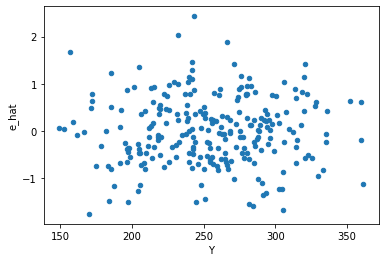

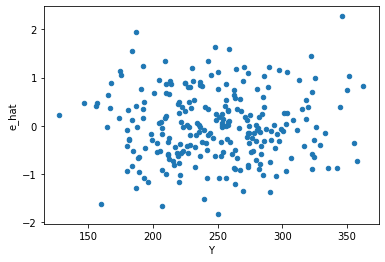

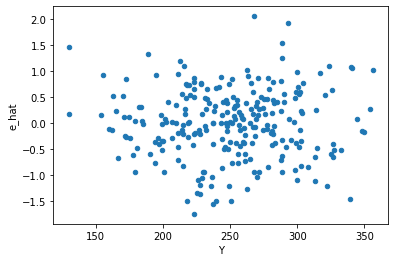

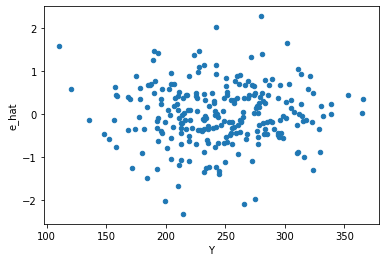

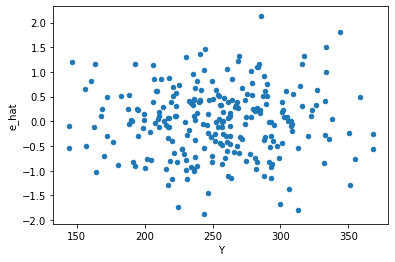

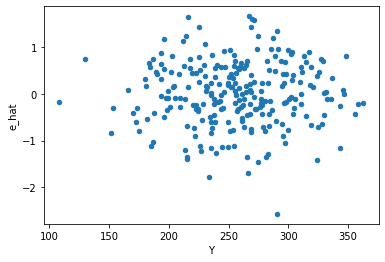

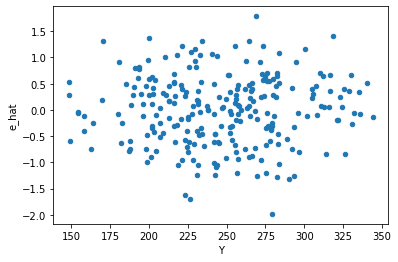

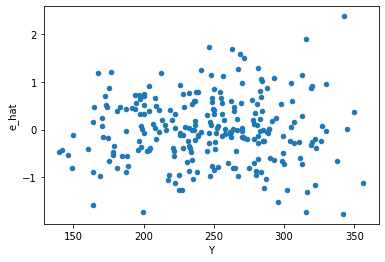

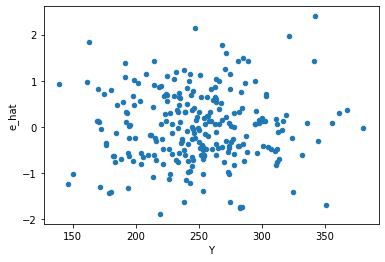

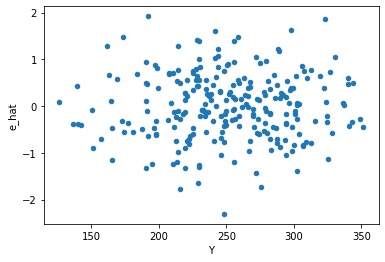

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew1.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew2.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew3.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew4.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew5.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew6.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew7.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew8.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew9.plot(x ='Y', y='e_hat', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,128.0,114.0,61.389483010098864,63.762336545957545,0.4796053360163974,0.5593187416312065,1.166206252576147,0.40241038542059027,0.7987948072897049,0.20120519271029513,Reject001=1 : Homoscedasticity
1.0,124.0,118.0,60.893586053063125,63.522242626995244,0.4910773068795413,0.5383240900592817,1.096210479527065,0.6154963062507945,0.6922518468746027,0.3077481531253973,Reject001=1 : Homoscedasticity
2.0,136.0,106.0,59.72766932756797,47.790290089760774,0.4391740391732939,0.45085179329962993,1.0265902650992722,0.8924027097710276,0.5537986451144862,0.4462013548855138,Reject001=1 : Homoscedasticity
4.0,128.0,114.0,61.85938779572172,55.525720767161005,0.48327646715407596,0.48706772602772813,1.0078449068624802,0.9686525275454638,0.5156737362272681,0.4843262637727319,Reject001=1 : Homoscedasticity
5.0,108.0,134.0,50.52229687996532,65.67450280716847,0.46779904518486404,0.4901082299042423,1.047689675618218,0.7941099765885886,0.6029450117057057,0.3970549882942943,Reject001=1 : Homoscedasticity
6.0,120.0,122.0,49.636464951366236,52.58467401751483,0.413637207928052,0.43102191817635105,1.042028884044017,0.8208402335363698,0.5895798832318151,0.4104201167681849,Reject001=1 : Homoscedasticity
9.0,115.0,127.0,51.40061560704022,73.77297096064977,0.44696187484382804,0.5808895351232265,1.2996400091757128,0.14963969988741876,0.9251801500562906,0.07481984994370938,Reject001=1 : Homoscedasticity
10.0,105.0,137.0,42.595796920844144,58.065610213615905,0.40567425638899185,0.42383657090230586,1.0447706854139114,0.8052258664620959,0.597387066768952,0.40261293323104796,Reject001=1 : Homoscedasticity
14.0,119.0,123.0,47.07273121172011,58.504306227875986,0.3955691698463875,0.47564476608029255,1.2024313377733684,0.3113124634535849,0.8443437682732076,0.15565623172679244,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,128.0,114.0,61.389483010098864,63.762336545957545,0.4796053360163974,0.5593187416312065,1.166206252576147,0.40241038542059027,Reject001=1 : Homoscedasticity
1.0,124.0,118.0,60.893586053063125,63.522242626995244,0.4910773068795413,0.5383240900592817,1.096210479527065,0.6154963062507945,Reject001=1 : Homoscedasticity
2.0,136.0,106.0,59.72766932756797,47.790290089760774,0.4391740391732939,0.45085179329962993,1.0265902650992722,0.8924027097710276,Reject001=1 : Homoscedasticity
3.0,124.0,118.0,70.98462473247542,53.90790954832384,0.5724566510683502,0.4568466910874902,0.7980459135812252,0.2152909321108502,Reject001=1 : Homoscedasticity
4.0,128.0,114.0,61.85938779572172,55.525720767161005,0.48327646715407596,0.48706772602772813,1.0078449068624802,0.9686525275454638,Reject001=1 : Homoscedasticity
5.0,108.0,134.0,50.52229687996532,65.67450280716847,0.46779904518486404,0.4901082299042423,1.047689675618218,0.7941099765885886,Reject001=1 : Homoscedasticity
6.0,120.0,122.0,49.636464951366236,52.58467401751483,0.413637207928052,0.43102191817635105,1.042028884044017,0.8208402335363698,Reject001=1 : Homoscedasticity
7.0,132.0,110.0,72.70025358348809,44.01805387776603,0.5507594968446068,0.40016412616150937,0.7265678185380671,0.07904857215016875,Reject001=1 : Homoscedasticity
8.0,118.0,124.0,71.46858215314617,74.79553761921619,0.6056659504503913,0.603189819509808,0.995911721735815,0.9832673008145484,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      994
Reject001=0 : Heteroscedasticity      6
Name: Result_test, dtype: int64